In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [ ]:
Dfile_path = "/content/3_20_Complete_Dataset_wLasso Variables .csv"
df = pd.read_csv(Dfile_path)
display(df)

,home_ownership,term,emp_length,purpose,verification_status,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,...,dti,revol_util,tot_coll_amt,bc_util,percent_bc_gt_75,Unemployment_Rate,Education_Level,House_Price,fico_score,fico_score_category
0,MORTGAGE,36 months,7,debt_consolidation,Not Verified,0,67.0,75,2,2,...,27.40,49.5,0,59.7,50.0,4.183333,14.946667,109620.22,682,Good
1,MORTGAGE,36 months,2,other,Source Verified,0,135.0,88,2,2,...,28.35,22.7,617,17.2,0.0,2.240476,27.611904,263622.90,702,Good
2,MORTGAGE,36 months,8,debt_consolidation,Verified,0,102.0,161,91,1,...,18.36,32.5,0,32.5,0.0,5.881818,14.304545,104790.00,742,Very Good
3,MORTGAGE,36 months,3,debt_consolidation,Not Verified,0,151.0,120,6,4,...,29.81,60.5,955,64.2,33.3,2.240476,27.611904,263622.90,692,Good
4,MORTGAGE,60 months,10,credit_card,Source Verified,0,134.0,161,26,21,...,33.49,43.0,0,59.9,37.5,5.881818,14.304545,104790.00,682,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371070,RENT,36 months,10,debt_consolidation,Source Verified,0,144.0,159,6,4,...,35.50,3.9,0,4.0,0.0,4.500000,31.800000,575841.40,797,Very Good
371071,MORTGAGE,36 months,7,debt_consolidation,Verified,0,192.0,145,3,3,...,33.01,66.4,0,55.8,50.0,4.500000,31.800000,575841.40,717,Good
371072,RENT,60 months,9,debt_consolidation,Not Verified,0,58.0,180,0,0,...,17.83,41.5,0,32.9,12.5,4.500000,31.800000,575841.40,682,Good
371073,RENT,36 months,0,credit_card,Not Verified,0,163.0,140,1,1,...,12.55,12.7,0,12.7,0.0,4.500000,31.800000,575841.40,727,Good


In [ ]:

dtype_mapping = {
    "emp_length": "float32",
    "bc_open_to_buy": "float32",
    "pct_tl_nvr_dlq": "float32",
    "total_bc_limit": "int32",
    "revol_util": "float32",
    "tot_coll_amt": "int32",
    "bc_util": "float32",
    "delinq_2yrs": "int32",
    "num_accts_ever_120_pd": "int32",
    "pub_rec": "int32",
    "pub_rec_bankruptcies": "int32",
    "mo_sin_old_rev_tl_op": "int32",
    "percent_bc_gt_75": "float32",
    "total_rev_hi_lim": "int32",
    "Unemployment_Rate": "float32",
    "Education_Level": "float32",
    "House_Price": "float32",
    "fico_score": "int32",
    "fico_score_category": "str"
}

# Apply the type casting
df = df.astype(dtype_mapping)


In [ ]:
# prompt: drop fico_score_category from df

df = df.drop('fico_score_category', axis=1)
display(df)

,home_ownership,term,emp_length,purpose,verification_status,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,...,loan_amnt,dti,revol_util,tot_coll_amt,bc_util,percent_bc_gt_75,Unemployment_Rate,Education_Level,House_Price,fico_score
0,MORTGAGE,36 months,7.0,debt_consolidation,Not Verified,0,67.0,75,2,2,...,8400,27.40,49.500000,0,59.700001,50.000000,4.183333,14.946667,109620.218750,682
1,MORTGAGE,36 months,2.0,other,Source Verified,0,135.0,88,2,2,...,4800,28.35,22.700001,617,17.200001,0.000000,2.240476,27.611904,263622.906250,702
2,MORTGAGE,36 months,8.0,debt_consolidation,Verified,0,102.0,161,91,1,...,1700,18.36,32.500000,0,32.500000,0.000000,5.881818,14.304545,104790.000000,742
3,MORTGAGE,36 months,3.0,debt_consolidation,Not Verified,0,151.0,120,6,4,...,16000,29.81,60.500000,955,64.199997,33.299999,2.240476,27.611904,263622.906250,692
4,MORTGAGE,60 months,10.0,credit_card,Source Verified,0,134.0,161,26,21,...,17000,33.49,43.000000,0,59.900002,37.500000,5.881818,14.304545,104790.000000,682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371070,RENT,36 months,10.0,debt_consolidation,Source Verified,0,144.0,159,6,4,...,10000,35.50,3.900000,0,4.000000,0.000000,4.500000,31.799999,575841.375000,797
371071,MORTGAGE,36 months,7.0,debt_consolidation,Verified,0,192.0,145,3,3,...,40000,33.01,66.400002,0,55.799999,50.000000,4.500000,31.799999,575841.375000,717
371072,RENT,60 months,9.0,debt_consolidation,Not Verified,0,58.0,180,0,0,...,18000,17.83,41.500000,0,32.900002,12.500000,4.500000,31.799999,575841.375000,682
371073,RENT,36 months,0.0,credit_card,Not Verified,0,163.0,140,1,1,...,4000,12.55,12.700000,0,12.700000,0.000000,4.500000,31.799999,575841.375000,727


In [ ]:
# prompt: change the type of columns who has objet as type to str

for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = df[column].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371075 entries, 0 to 371074
Data columns (total 58 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   home_ownership              371075 non-null  object 
 1   term                        371075 non-null  object 
 2   emp_length                  371075 non-null  float32
 3   purpose                     371075 non-null  object 
 4   verification_status         371075 non-null  object 
 5   chargeoff_within_12_mths    371075 non-null  int64  
 6   mo_sin_old_il_acct          371075 non-null  float64
 7   mo_sin_old_rev_tl_op        371075 non-null  int32  
 8   mo_sin_rcnt_rev_tl_op       371075 non-null  int64  
 9   mo_sin_rcnt_tl              371075 non-null  int64  
 10  mort_acc                    371075 non-null  int64  
 11  mths_since_recent_bc        371075 non-null  float64
 12  mths_since_recent_inq       371075 non-null  float64
 13  num_bc_sats   

In [ ]:
numerical_vars = ['emp_length',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mths_since_recent_inq',
 'num_bc_tl',
 'delinq_2yrs',
 'inq_last_6mths',
 'pub_rec',
 'collections_12_mths_ex_med',
 'acc_open_past_24mths',
 'num_accts_ever_120_pd',
 'bc_open_to_buy',
 'tot_hi_cred_lim',
 'loan_amnt',
 'dti',
 'tot_coll_amt',
 'percent_bc_gt_75',
 'House_Price']
cat_vars = ['verification_status', 'home_ownership', 'term']

df = df[numerical_vars + cat_vars + ["fico_score"]]

In [ ]:
display(df)

,emp_length,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_inq,num_bc_tl,delinq_2yrs,inq_last_6mths,...,tot_hi_cred_lim,loan_amnt,dti,tot_coll_amt,percent_bc_gt_75,House_Price,verification_status,home_ownership,term,fico_score
0,7.0,0,67.0,75,2,2,7.0,6,0,0,...,199078,8400,27.40,0,50.000000,109620.218750,Not Verified,MORTGAGE,36 months,682
1,2.0,0,135.0,88,2,2,6.0,2,0,0,...,425671,4800,28.35,617,0.000000,263622.906250,Source Verified,MORTGAGE,36 months,702
2,8.0,0,102.0,161,91,1,2.0,2,0,0,...,514614,1700,18.36,0,0.000000,104790.000000,Verified,MORTGAGE,36 months,742
3,3.0,0,151.0,120,6,4,9.0,6,0,0,...,187585,16000,29.81,955,33.299999,263622.906250,Not Verified,MORTGAGE,36 months,692
4,10.0,0,134.0,161,26,21,5.0,13,1,1,...,202708,17000,33.49,0,37.500000,104790.000000,Source Verified,MORTGAGE,60 months,682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371070,10.0,0,144.0,159,6,4,4.0,25,0,2,...,203738,10000,35.50,0,0.000000,575841.375000,Source Verified,RENT,36 months,797
371071,7.0,0,192.0,145,3,3,0.0,9,0,0,...,497224,40000,33.01,0,50.000000,575841.375000,Verified,MORTGAGE,36 months,717
371072,9.0,0,58.0,180,0,0,0.0,11,0,1,...,104262,18000,17.83,0,12.500000,575841.375000,Not Verified,RENT,60 months,682
371073,0.0,0,163.0,140,1,1,8.0,11,0,0,...,141950,4000,12.55,0,0.000000,575841.375000,Not Verified,RENT,36 months,727


correlation with heatmap

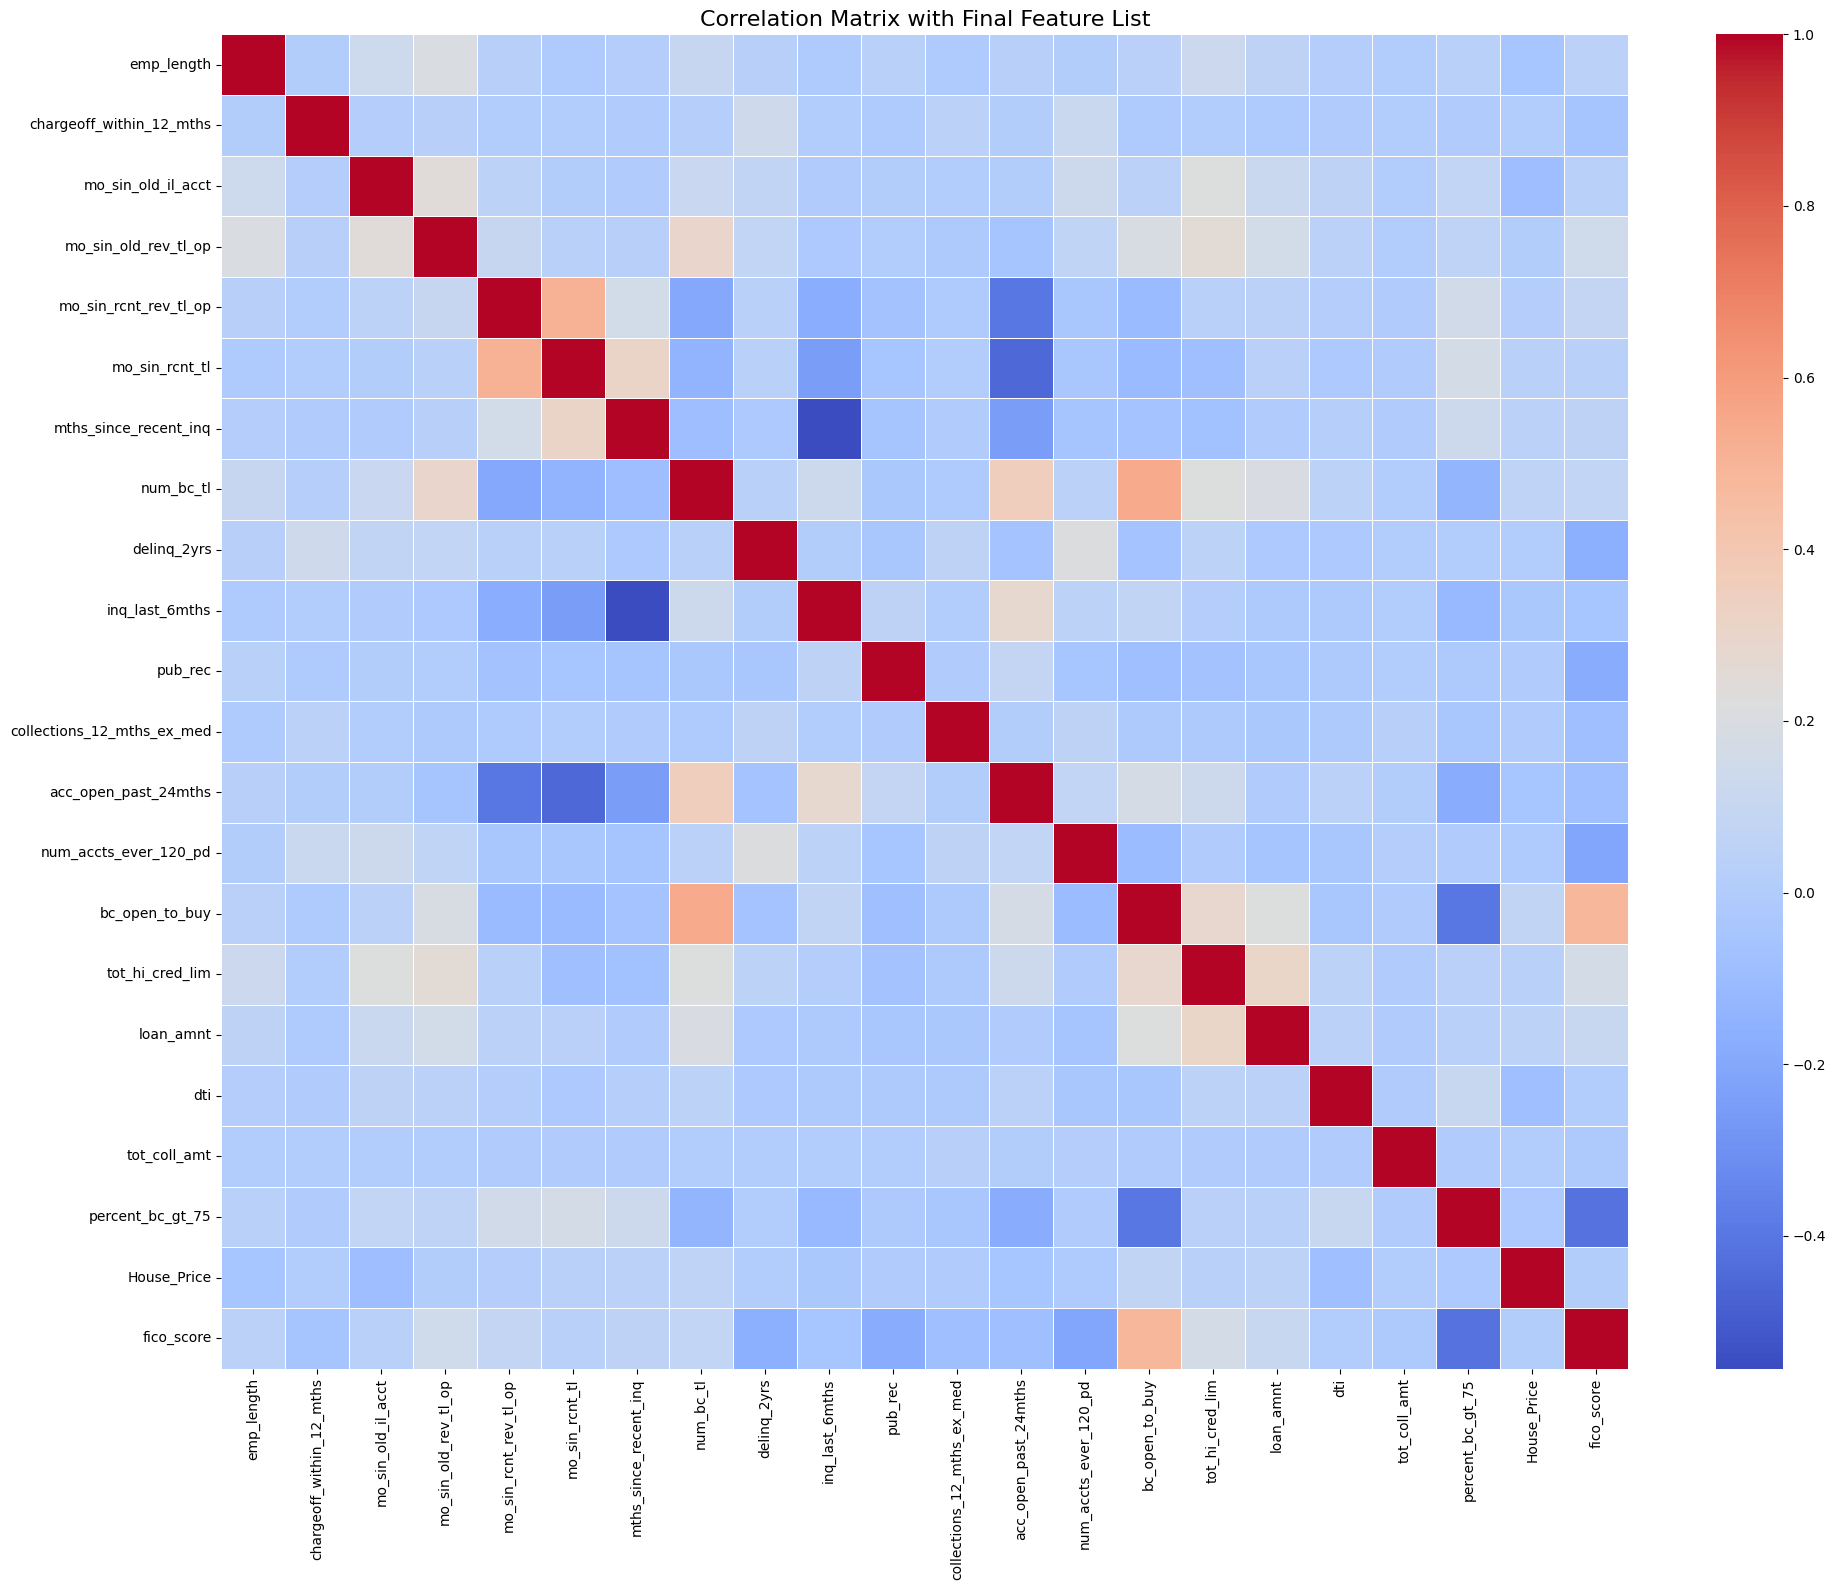

In [ ]:
final_corr_features =  numerical_vars + ["fico_score"]
df_filtered = df[final_corr_features]
corr_matrix = df_filtered.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix with Final Feature List", fontsize=16)
plt.tight_layout()
plt.show()

##linear regression
check for linearity

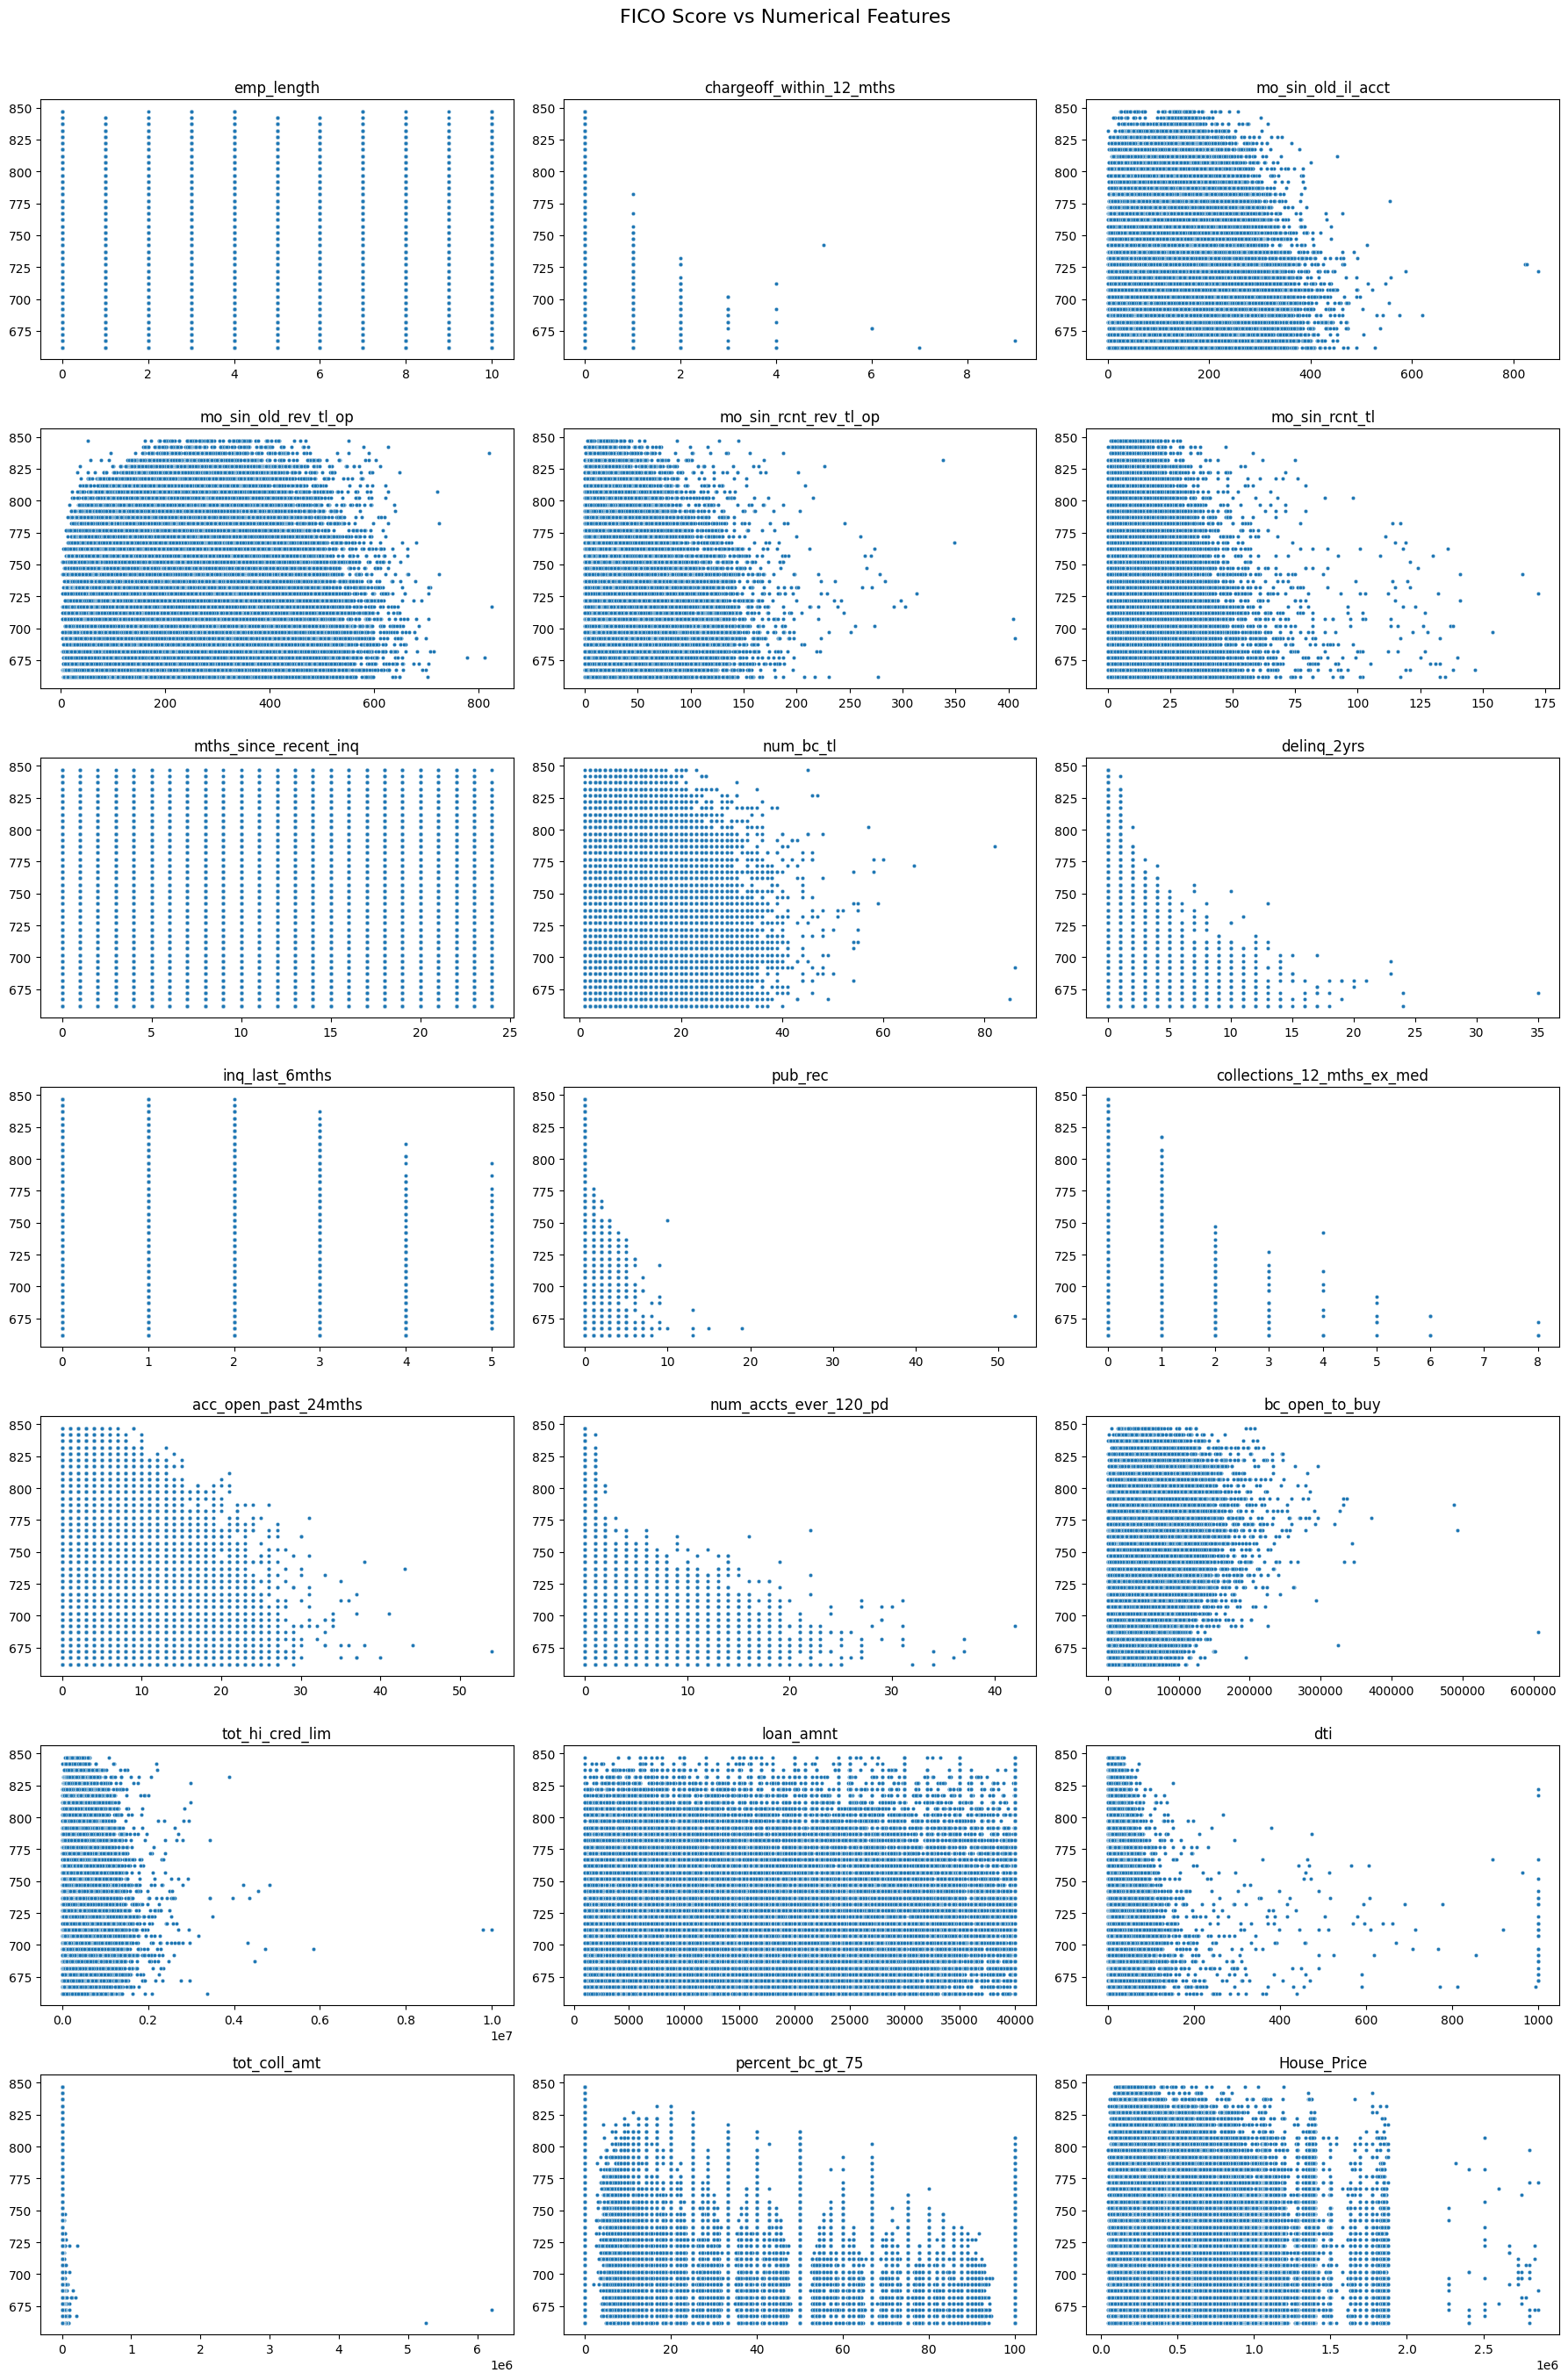

In [ ]:
rows = (len(numerical_vars) // 3) + 1
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
fig.suptitle("FICO Score vs Numerical Features", fontsize=16)

# Step 3: Loop through and plot
for idx, col in enumerate(numerical_vars):
    ax = axes[idx // cols, idx % cols]
    sns.scatterplot(data=df, x=col, y="fico_score", ax=ax, s=10)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Hide any empty subplots
for i in range(len(numerical_vars), rows * cols):
    fig.delaxes(axes[i // cols, i % cols])

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

Log Transform + Standardize (z-score) or Normalize

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Columns to log transform
log_transform_cols = [
    "chargeoff_within_12_mths", "mo_sin_old_il_acct", "mo_sin_old_rev_tl_op",
    "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "pub_rec",
    "collections_12_mths_ex_med", "acc_open_past_24mths",
    "loan_amnt", "dti", "tot_hi_cred_lim", "tot_coll_amt", "House_Price", "bc_open_to_buy"
]

# Apply log1p transform to handle zeros
for col in log_transform_cols:
    if col in df.columns:
        df[f"log_{col}"] = np.log1p(df[col])

# Columns to standardize
standardize_cols = [
    "percent_bc_gt_75", "inq_last_6mths", "num_bc_tl", "mths_since_recent_inq"
]

# Apply standardization
scaler = StandardScaler()
df[standardize_cols] = scaler.fit_transform(df[standardize_cols])


In [ ]:
log_features = [f"log_{col}" for col in log_transform_cols]
transformed_features = set(log_features + standardize_cols)

# 5. Identify untouched features
untouched_features = [col for col in numerical_vars if col not in log_transform_cols and col not in standardize_cols]

# 6. Combine all
final_feature_list = list(transformed_features.union(untouched_features))

# Optional: sort for readability
final_feature_list = sorted(final_feature_list)

# Show the final list
final_feature_list

['delinq_2yrs',
 'emp_length',
 'inq_last_6mths',
 'log_House_Price',
 'log_acc_open_past_24mths',
 'log_bc_open_to_buy',
 'log_chargeoff_within_12_mths',
 'log_collections_12_mths_ex_med',
 'log_dti',
 'log_loan_amnt',
 'log_mo_sin_old_il_acct',
 'log_mo_sin_old_rev_tl_op',
 'log_mo_sin_rcnt_rev_tl_op',
 'log_mo_sin_rcnt_tl',
 'log_pub_rec',
 'log_tot_coll_amt',
 'log_tot_hi_cred_lim',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_bc_tl',
 'percent_bc_gt_75']

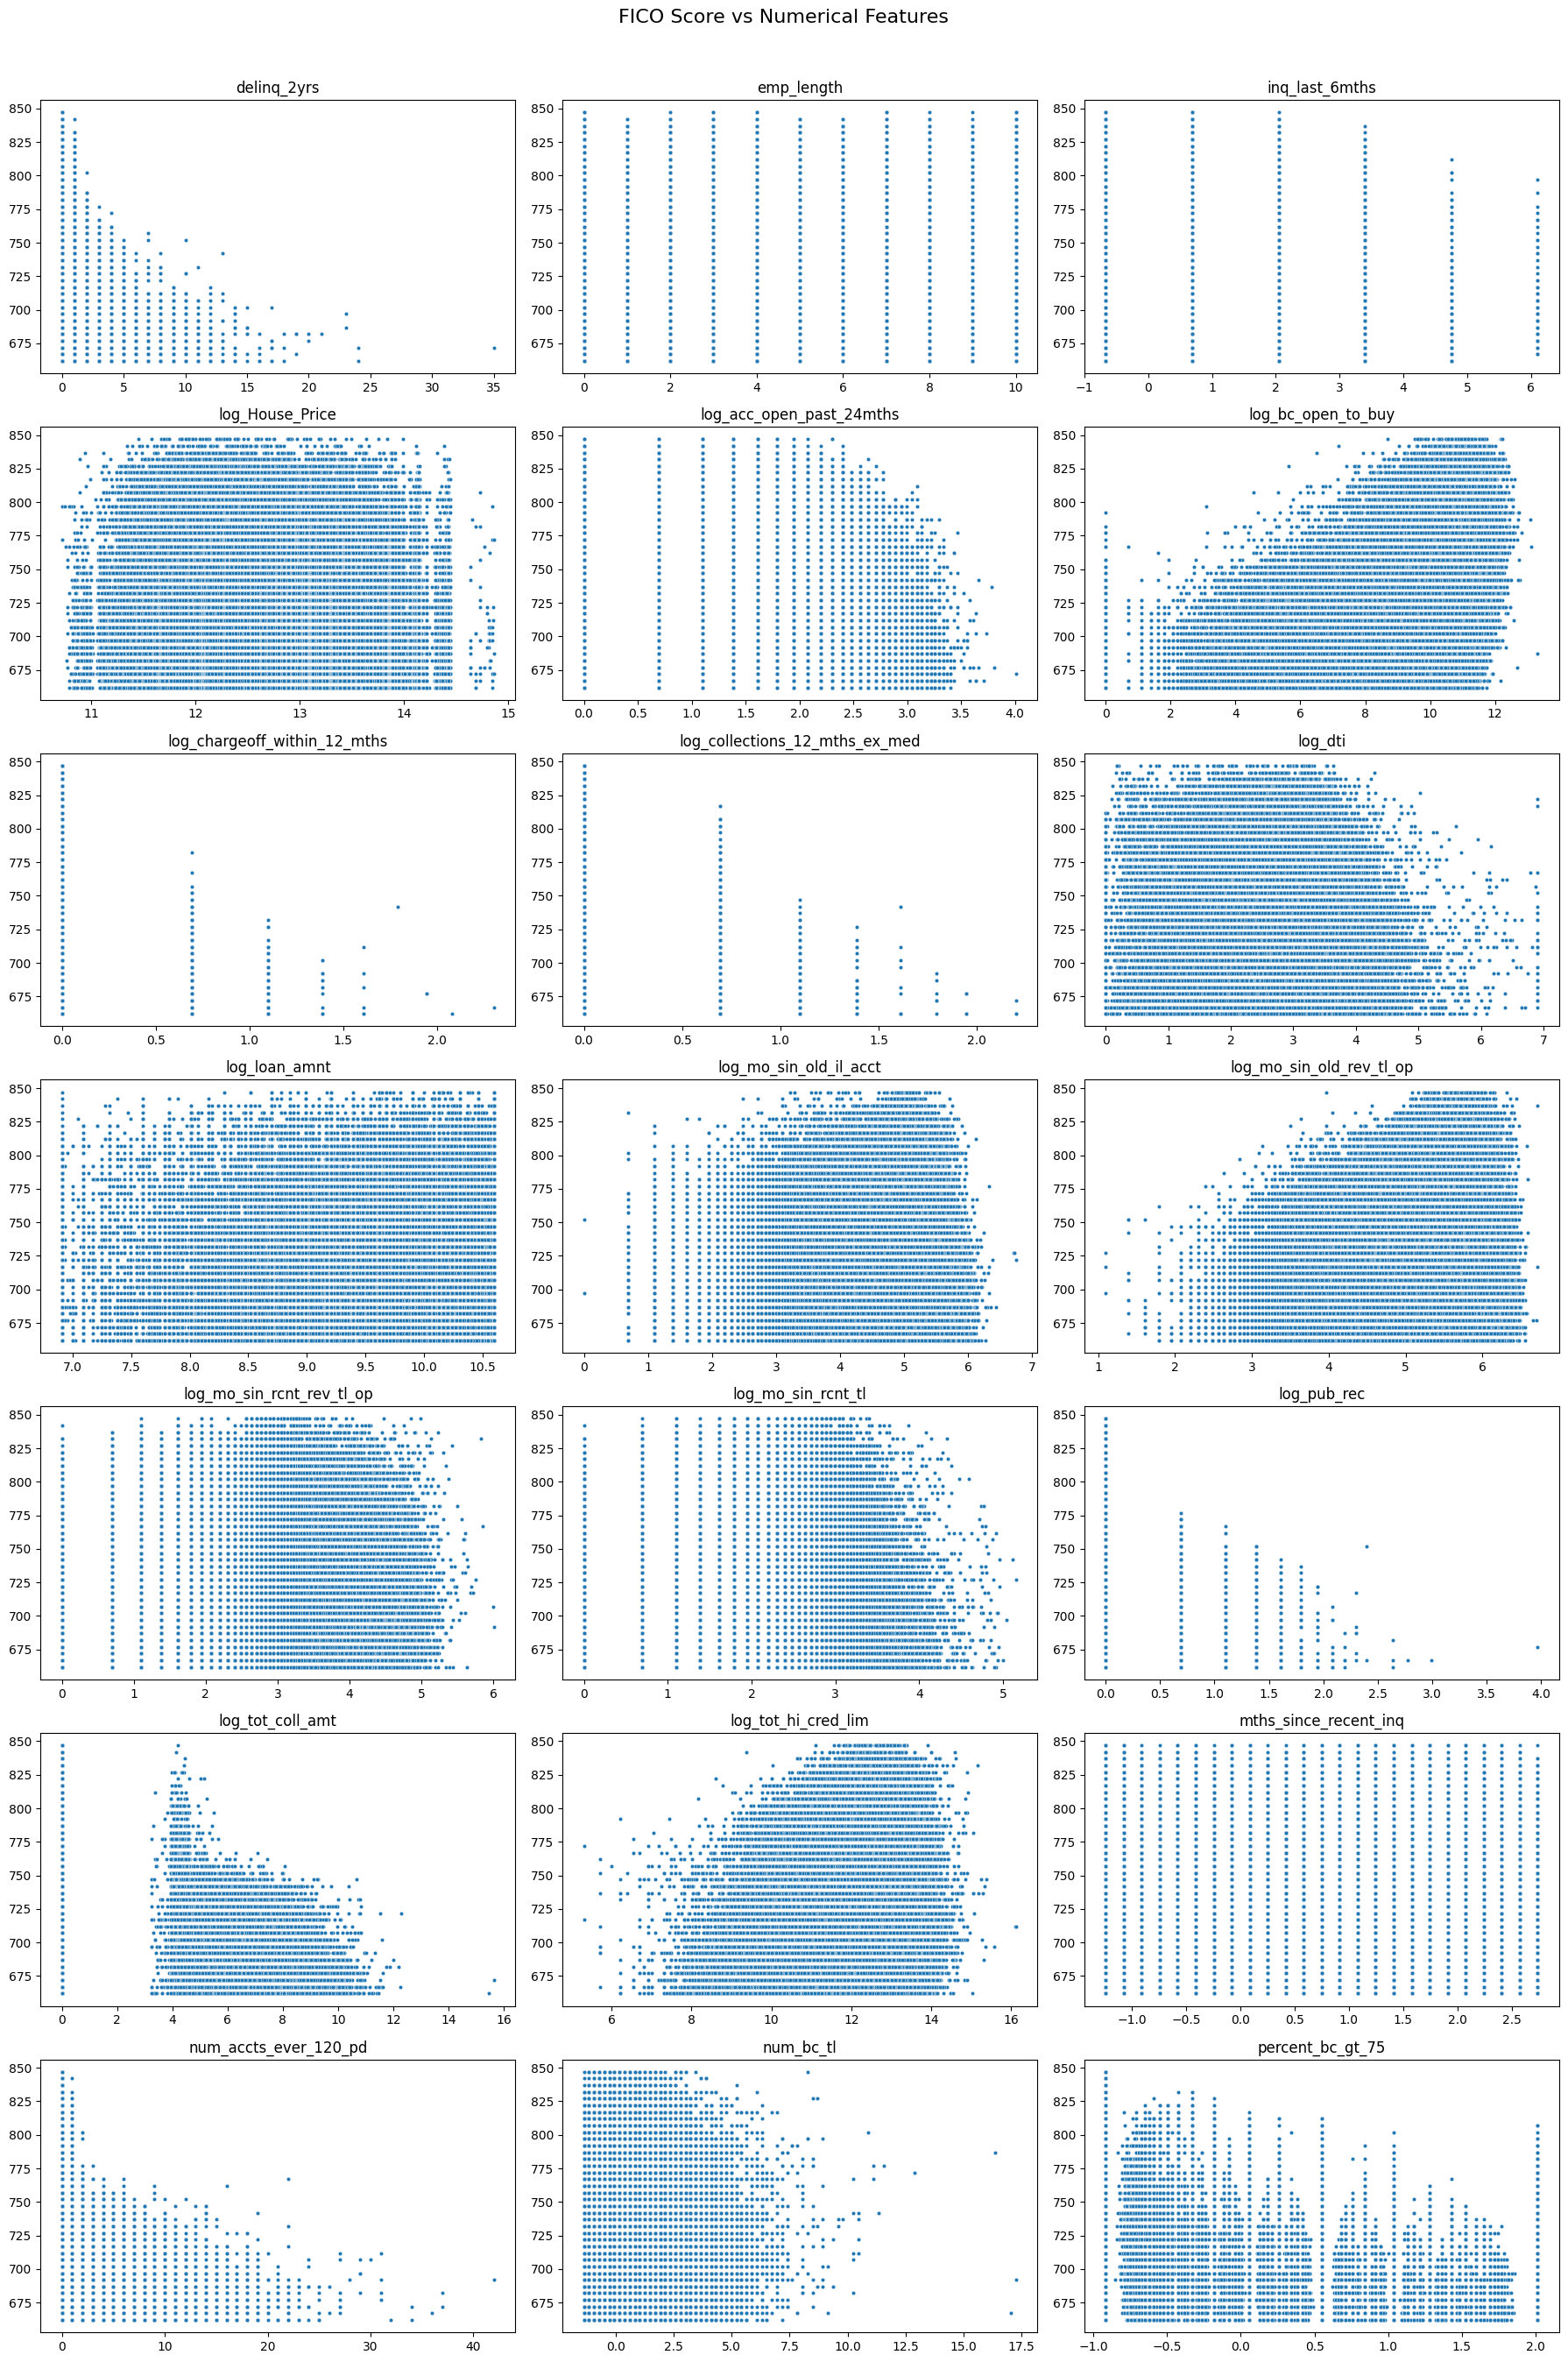

In [ ]:
rows = (len(final_feature_list) // 3) + 1
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
fig.suptitle("FICO Score vs Numerical Features", fontsize=16)

# Step 3: Loop through and plot
for idx, col in enumerate(final_feature_list):
    ax = axes[idx // cols, idx % cols]
    sns.scatterplot(data=df, x=col, y="fico_score", ax=ax, s=10)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Hide any empty subplots
for i in range(len(final_feature_list), rows * cols):
    fig.delaxes(axes[i // cols, i % cols])

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

In [ ]:
# Define features and target variable
numerical_columns = final_feature_list
X = df[numerical_columns + cat_vars]
y = df["fico_score"].astype(float)  # Convert target to float

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_vars)
    ])

# Define the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Display results
mae, rmse, r2

(20.431877187803646, 25.818570615952126, 0.4618255993436228)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371075 entries, 0 to 371074
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   emp_length                      371075 non-null  float32
 1   chargeoff_within_12_mths        371075 non-null  int64  
 2   mo_sin_old_il_acct              371075 non-null  float64
 3   mo_sin_old_rev_tl_op            371075 non-null  int32  
 4   mo_sin_rcnt_rev_tl_op           371075 non-null  int64  
 5   mo_sin_rcnt_tl                  371075 non-null  int64  
 6   mths_since_recent_inq           371075 non-null  float64
 7   num_bc_tl                       371075 non-null  float64
 8   delinq_2yrs                     371075 non-null  int32  
 9   inq_last_6mths                  371075 non-null  float64
 10  pub_rec                         371075 non-null  int32  
 11  collections_12_mths_ex_med      371075 non-null  int64  
 12  acc_open_past_24

In [ ]:
X = pd.get_dummies(df[cat_vars], drop_first=True,dtype=float)

X = pd.concat([df[final_feature_list], X], axis=1)
y = df["fico_score"]

# Step 6: Add intercept and fit model
X = sm.add_constant(X)
# Fit the OLS model
model_stats = sm.OLS(y, X).fit()

# Print the summary of the model, including coefficients and p-values
print(model_stats.summary())

# Access coefficients and p-values directly
coefficients = model_stats.params
p_values = model_stats.pvalues

print("\nCoefficients:")
print(coefficients)

print("\nP-values:")
p_values

                            OLS Regression Results                            
Dep. Variable:             fico_score   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                 1.182e+04
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:32:40   Log-Likelihood:            -1.7343e+06
No. Observations:              371075   AIC:                         3.469e+06
Df Residuals:                  371047   BIC:                         3.469e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

,0
const,0.000000e+00
delinq_2yrs,0.000000e+00
emp_length,8.931034e-20
inq_last_6mths,1.026459e-01
log_House_Price,2.305871e-146
log_acc_open_past_24mths,0.000000e+00
log_bc_open_to_buy,0.000000e+00
log_chargeoff_within_12_mths,1.090608e-82
log_collections_12_mths_ex_med,1.322758e-119
log_dti,1.075553e-24


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the target variable and the constant if it's already added
X_vif =df[final_feature_list].drop(columns=['const'], errors='ignore')  # Safe drop
X_vif = X_vif.drop(columns=['fico_score'], errors='ignore')  # Safe drop
X_vif = X_vif.astype(float)  # Ensure all columns are numeric

# Create a DataFrame for VIF results
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Sort by highest VIF
vif_data = vif_data.sort_values('VIF', ascending=False)

print(vif_data)


                           Feature         VIF
16             log_tot_hi_cred_lim  195.929791
3                  log_House_Price  190.832222
9                    log_loan_amnt  180.784280
11        log_mo_sin_old_rev_tl_op   86.844282
5               log_bc_open_to_buy   75.254358
10          log_mo_sin_old_il_acct   64.392777
8                          log_dti   26.952378
13              log_mo_sin_rcnt_tl   18.899869
12       log_mo_sin_rcnt_rev_tl_op   16.658864
4         log_acc_open_past_24mths   16.182865
1                       emp_length    3.678186
20                percent_bc_gt_75    2.076658
17           mths_since_recent_inq    1.558516
2                   inq_last_6mths    1.503069
19                       num_bc_tl    1.474455
18           num_accts_ever_120_pd    1.261506
15                log_tot_coll_amt    1.258549
0                      delinq_2yrs    1.197830
14                     log_pub_rec    1.195154
7   log_collections_12_mths_ex_med    1.072389
6     log_cha

XGBoost

In [ ]:
!pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_columns = final_feature_list
X = df[numerical_columns + cat_vars]
y = df["fico_score"].astype(float)  # Convert target to float


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Changes here ---
# Create a OneHotEncoder instance
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sparse=False for XGBoost compatibility

# Fit and transform the categorical columns in the training data
encoded_categorical_train = encoder.fit_transform(X_train[cat_vars])

# Transform the categorical columns in the test data
encoded_categorical_test = encoder.transform(X_test[cat_vars])

# Create DataFrames from the encoded data
encoded_categorical_train_df = pd.DataFrame(encoded_categorical_train,columns=encoder.get_feature_names_out(cat_vars), index =X_train.index)
encoded_categorical_test_df = pd.DataFrame(encoded_categorical_test, columns=encoder.get_feature_names_out(cat_vars), index =X_test.index)

# Concatenate the numerical and encoded categorical features
X_train_encoded = pd.concat([X_train[numerical_columns], encoded_categorical_train_df], axis=1)
X_test_encoded = pd.concat([X_test[numerical_columns], encoded_categorical_test_df], axis=1)
# --- End of changes ---

# Fit XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_encoded, y_train)  # Use encoded data

# Predictions and evaluation
y_pred = xgb_model.predict(X_test_encoded)  # Use encoded data
mae = mean_absolute_error(y_test, y_pred)
rmse_best = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

(mae, rmse, r2)



(15.794440945272761, 25.818570615952126, 0.6644247585907667)

In [ ]:
# Get number of samples and features
n = X_test_encoded.shape[0]  # number of observations
k = X_test_encoded.shape[1]  # number of predictors

# Calculate adjusted R²
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f"Adjusted R²: {adjusted_r2:.4f}")


Adjusted R²: 0.6643


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_columns = final_feature_list
X = df[numerical_columns + cat_vars]
y = df["fico_score"].astype(float)  # Convert target to float


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Changes here ---
# Create a OneHotEncoder instance
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sparse=False for XGBoost compatibility

# Fit and transform the categorical columns in the training data
encoded_categorical_train = encoder.fit_transform(X_train[cat_vars])

# Transform the categorical columns in the test data
encoded_categorical_test = encoder.transform(X_test[cat_vars])

# Create DataFrames from the encoded data
encoded_categorical_train_df = pd.DataFrame(encoded_categorical_train,columns=encoder.get_feature_names_out(cat_vars), index =X_train.index)
encoded_categorical_test_df = pd.DataFrame(encoded_categorical_test, columns=encoder.get_feature_names_out(cat_vars), index =X_test.index)

# Concatenate the numerical and encoded categorical features
X_train_encoded = pd.concat([X_train[numerical_columns], encoded_categorical_train_df], axis=1)
X_test_encoded = pd.concat([X_test[numerical_columns], encoded_categorical_test_df], axis=1)
# --- End of changes ---

# Fit XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_encoded, y_train)  # Use encoded data

# Predictions and evaluation
y_pred = xgb_model.predict(X_test_encoded)  # Use encoded data
mae = mean_absolute_error(y_test, y_pred)
rmse_best = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

(mae, rmse, r2)



(15.81930545857497, 25.818570615952126, 0.6659559477613558)

In [ ]:
# Get number of samples and features
n = X_test_encoded.shape[0]  # number of observations
k = X_test_encoded.shape[1]  # number of predictors

# Calculate adjusted R²
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f"Adjusted R²: {adjusted_r2:.4f}")


Adjusted R²: 0.6659
